<a href="https://colab.research.google.com/github/iYuuba21/PCD-6/blob/main/PDC_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

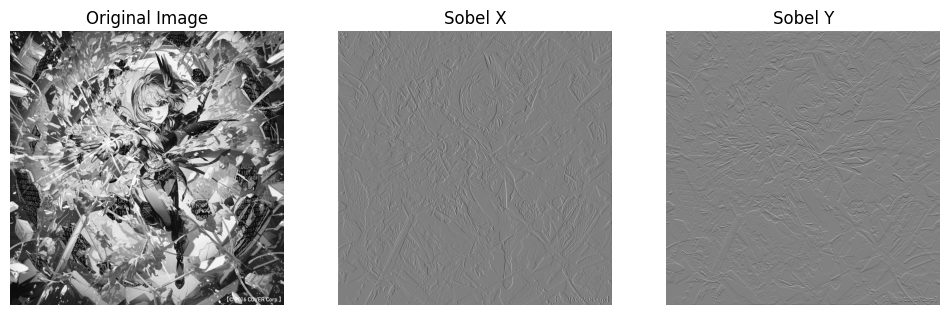

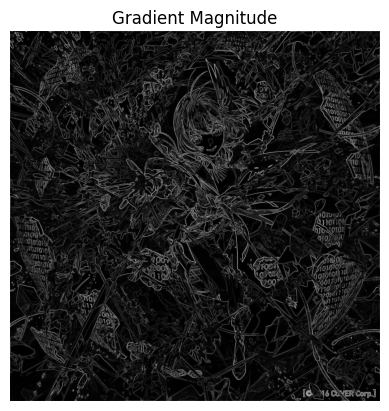

In [2]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as img

# Baca gambar grayscale
image = img.imread("/content/WhatsApp Image 2024-12-03 at 12.32.13.jpeg", format='jpeg')

# Konversi ke skala abu-abu jika belum dalam grayscale
if len(image.shape) == 3:
    image = np.dot(image[..., :3], [0.2989, 0.5870, 0.1140])

# Definisikan kernel Sobel X dan Y
sobelX = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

sobelY = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

# Tambahkan padding ke gambar
imgPad = np.pad(image, pad_width=1, mode='constant', constant_values=0)

# Buat array kosong untuk Gx dan Gy
Gx = np.zeros_like(image)
Gy = np.zeros_like(image)

# Lakukan iterasi untuk menghitung gradien
for y in range(1, imgPad.shape[0] - 1):
    for x in range(1, imgPad.shape[1] - 1):
        # Ambil region 3x3
        region = imgPad[y-1:y+2, x-1:x+2]
        # Hitung Gx dan Gy
        Gx[y-1, x-1] = (region * sobelX).sum()
        Gy[y-1, x-1] = (region * sobelY).sum()

# Hitung magnitudo gradien
gradient_magnitude = np.sqrt(Gx**2 + Gy**2)
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255  # Normalisasi ke 0-255

# Tampilkan hasil
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Sobel X")
plt.imshow(Gx, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Sobel Y")
plt.imshow(Gy, cmap='gray')
plt.axis('off')

plt.figure()
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude, cmap='gray')
plt.axis('off')

plt.show()